In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="fnlvqr_banana",
    dataset_number_of_points=20000,
    dataloader_parameters=dict(batch_size=512, shuffle=True),
    pushforward_operator_name="fast_non_linear_vector_quantile_regression",
    pushforward_operator_parameters=dict(
        fnlvqr_mlp_arguments=dict(
            verbose=True,
            num_epochs=200,
            epsilon=5e-3,
            lr=0.4,
            gpu=True,
            skip=False,
            batchnorm=False,
            hidden_layers=(2, 10, 20),
            batchsize_y=None,
            batchsize_u=None,
            inference_batch_size=100,
            lr_factor=0.9,
            lr_patience=300,
            lr_threshold=0.5 * 0.01,
        ),
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=32,
        number_of_hidden_layers=4,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.1),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/fast_non_linear_vector_quantile_regression/vqr/solvers/regularized_lse.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_th = tensor(Y, **dtd)


  0%|                                                                   | 0/200 [00:00<?, ?epochs/s]

Epoch: 10, Objective: 0.866, LR: 0.000000: 100%|██████████| 10/10 [00:32<00:00,  3.24s/it]


In [7]:
import torch
from datasets import FNLVQR_Banana

dataset = FNLVQR_Banana(experiment.tensor_parameters)
X_gt, Y_gt = dataset.sample_joint(1000)
U = torch.rand(1000, 2).to(**experiment.tensor_parameters)
X = torch.rand(1000, 1).to(**experiment.tensor_parameters) * (X_gt.max() - X_gt.min()) + X_gt.min()
Y = model.push_u_given_x(U, X)
U_approx = model.push_y_given_x(Y_gt, X_gt)

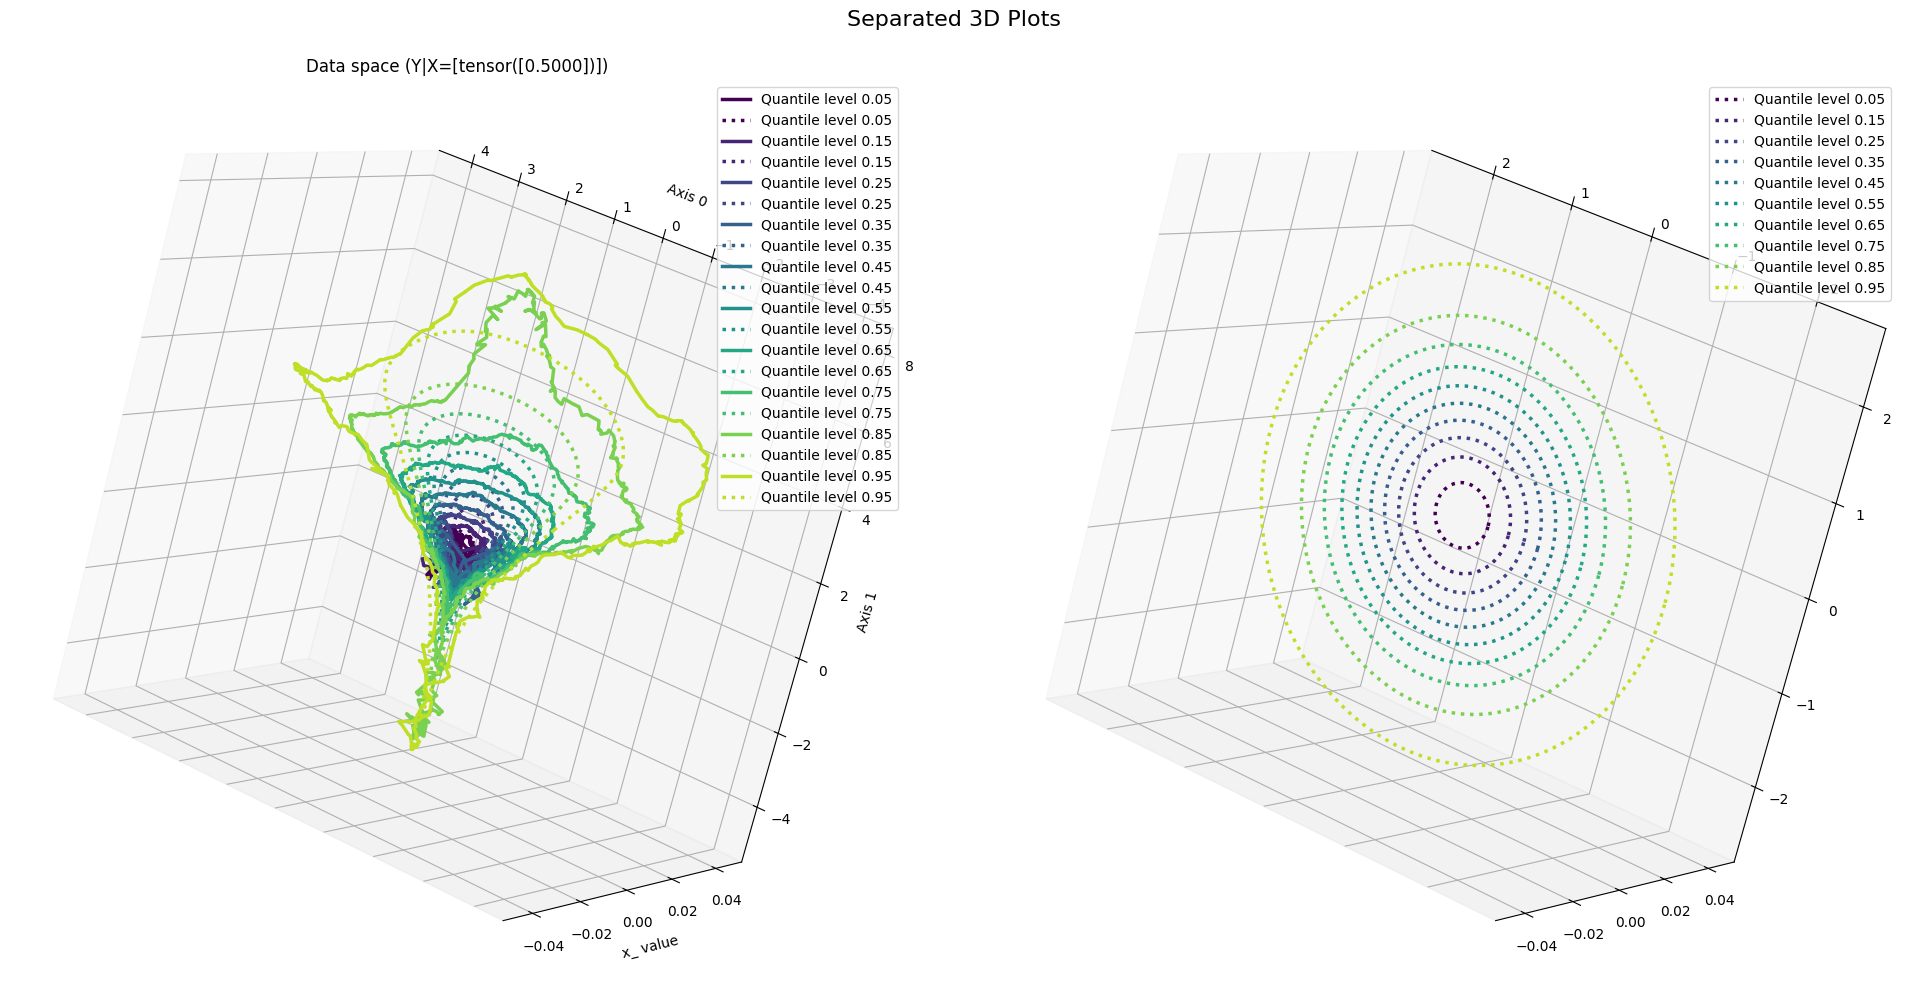

In [7]:
from utils.plot import plot_quantile_levels_from_dataset
from datasets import ConvexBananaDataset

dataset = ConvexBananaDataset(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[0.5]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)